# 2 時系列データ入門

時系列データの分析は、日々変化する世界を理解し、将来の動向を予測するために不可欠なツールです。私たちの周りには、時間の経過と共に変化する多くの現象が存在します。これらの現象を数値化した時系列データを分析することによって、これらの変化の背後にあるパターンや原因を理解し、より賢明な意思決定を行うための洞察を得ます。

本セミナーでは、時系列データ分析の基本から応用までを段階的に学んでいきます。第2章では、時系列データの分析に必要な基礎概念から始めて、確率過程と確定的過程の理解、さらには時系列データの実際の解析方法について詳しく掘り下げていきます。これらの基本的な概念をしっかりと理解することで、より複雑な時系列モデルや予測手法へとスムーズに進むことができるようにします。

2.1節「確率過程入門」では、時系列データのランダム性とその統計的特性を扱います。2.2節「確定的過程入門」では、時間に依存する確定的な要素（例えばトレンドや季節性）に焦点を当てます。そして、2.3節「時系列解析」では、これらの概念を実際のデータに応用し、時系列データの分析方法を詳しく学びます。

## 2.1 確率過程入門

ー確率過程ー

時間$t\in[0,\infty)$に対して,確率変数$X_t$が与えられたとき,その族$X=(X_t)_{t\ge0}$を確率過程といいます.

1. $t$が連続値をとりうる場合: $X$を連続時間確率過程.また
2. $t$を離散値で考える場合: $X$を離散時間確率過程（時系列）

とよびます.

確率過程$X=(X_t)_{t\ge0}$が与えられたとき,その実現値の集合を$(X_t)_{t\ge0}$と書き区別します.実現値を強く意識するためです。$t\rightarrow x_t$なる$t$の関数を考え、これを$X$のバス(path)といいます.つまり実現したパスを説明する関数を$t$を引数として考えるということです。ここで候補となる母集団の分布は既知の確率分布を出発点としてそのパラメータの推定から始めます。

ー独立定常増分一

以下の(1),(2)を満たす確率過程$X=(X_t){t\ge0}$を独立定常増分過程といいます.   
(1)独立増分性:任意の$0=t_0<t_1<\cdots<t_{n-1}$に対して,

$$X_{t_0},X_{t_1}-X_{t_0}, X_{t_2}-X_{t_1},.X_{t_n}-X_{t_n}、$$

は互いに独立；

(2)定常増分性：任意の$ 0\le t<t+h$に対して,$X_{t+h}-X_t$の分布は$X_h-X_0$の分布と同一  


ーブラウン運動ー

$B_0=0$なる確率過程$B=(B_t)_{t\ge0}$が以下の(1)$\sim$(3)の性質を満たすとき,$B$をブラウン運動といいます. 

(1)$B$は独立定常増分過程;   
(2)各$t\ge 0$に対して,(周辺分布)$B_t\sim N(\mu t,\sigma^2t)$;    
(3)$B$のパスは連続.    

ここで$N(\mu t,\sigma^2t)$は平均$\mu t$、分散$\sigma^2t$の正規分布です。
$\mu=0,\sigma^2=1$となるものを標準ブラウン連動またはウイナー過程といいます.

ーランダムウォークー

独立定常増分過程によるプラウン運動に対して,  
(1)$t_k=\frac{k}{n}(k=0,1,\cdots,n)$とし；  
(2)$0=t_0<t_1<\cdots<t_n=t=1$なる$[0,1]$の分割をとり；  
(3)各$k$に対して,  
$$B_{t_k}=\sum_{i=1}^k \varepsilon_i , \varepsilon=B_{t_i}-B_{t_{i-1}}$$

と表すと,プラウン運動の定義により$(\varepsilon_i)_{i=1,\cdots,n}$は独立に$N(\mu/n,\sigma^2/n)$に従います.

$$点列\; B_{t_0}(=0),B_{t_1},B_{t_2},\cdots,B_{t_n}$$

はプラウン運動のパスの一部であり,確率変数列$(\varepsilon_i)$の和になっています。これはランダム・ウォークです.任意の分割数$n \rightarrow \infty$の極限でプラウン運動のパスが現れます.これは最も基本的な確率過程の１つで、豊かな表現力を持ちます。

強いトレンド、弱いトレンド、周期的な動き、直線的な上昇、または下落、波打つ動きなど、どれも予測可能なパターンに見えますが、すべて確率変数の和で表現されています.図2.1.1参照.これを意識することにより、予測が困難なランダムなプロセスを理解し、分析するための基盤が提供されます。

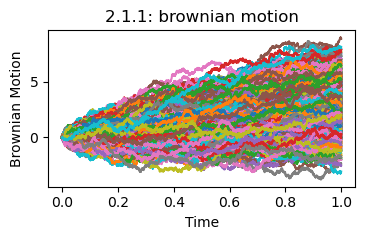

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.random import default_rng, Generator, PCG64, MT19937
rng = default_rng()

fig = plt.figure(figsize=(4,2.5)) 
x = np.linspace(0, 1,5000)
for i in range(1000):
    rnd=rng.standard_normal((5000,1))*2/np.sqrt(5000)+3/5000
    frame=pd.DataFrame(rnd.cumsum())
    plt.plot(x,frame)
plt.title('2.1.1: brownian motion')
plt.xlabel('Time')
plt.ylabel('Brownian Motion')
plt.tight_layout()

## 2.2 確定的過程入門

決定論的現象や確定的現象は、原因と結果が明確に関連づけられ、将来の状態が過去の状態によって完全に決定されるような現象です。この概念は、物理学、数学、経済学など多くの科学分野において重要な役割を果たします。

ー一般的な決定論的現象ー

決定論的現象は、システムの状態が初期条件と既知の法則によって完全に予測可能である場合に当てはまります。例えば、ニュートンの運動方程式は決定論的な法則の一例です。初期速度と力が分かれば、物体の未来の位置を正確に計算することができます。

ー時系列分析における決定論的要素ー

時系列分析において、決定論的要素は、データ生成プロセスにおいてランダム性（確率的要素）と対照的な役割を持ちます。具体的には以下のような要素が含まれます：

1. **トレンド**:
   トレンドは、時系列データの長期的な変化を示します。例えば、線形トレンドは時間の経過とともに一定の割合で増加または減少するパターンを示します。

2. **季節性**:
   季節性は、年次、四半期、月次などの定期的な周期で繰り返されるパターンです。例えば、小売業の売上がクリスマスシーズンに上昇するのは季節性の一例です。

3. **介入や構造的変化**:
   特定のイベントや政策の変更が時系列データに影響を与える場合、これらも決定論的要素として扱われます。

＊サンプルを用いての理解＊

`DeterministicProcess` クラスを使用して季節性をモデル化するサンプルを作成しました。この例では、ランダムウォークとして振る舞う時系列データに対して、季節性のダミー変数とフーリエ項を用いて季節性をモデル化しています。

＊＊実装された手順＊＊

1. **時系列データの生成**：
   60ヶ月分（5年間）の月次データをランダムウォークとして生成しました。

2. **季節性モデリング**：
   `CalendarFourier` を用いてフーリエ項を生成し、これを `DeterministicProcess` に追加しました。これにより、季節性のより複雑なパターンをモデル化できます。

3. **決定論的成分の生成**：
   季節性のダミー変数とフーリエ項を含む決定論的成分を生成しました。

4. **プロット**：
   元の時系列データと季節性の成分をプロットしています。プロットでは、季節性の成分がどのようにデータに影響を与えるかを視覚的に示しています。

このサンプルは、時系列データに季節性の影響をモデル化する方法の一例を示しています。このような季節性のモデリングは、特に季節的変動が顕著なデータ（例えば気象データや小売売上など）において有用です。

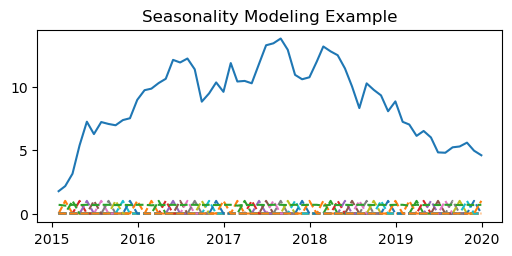

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
import matplotlib.pyplot as plt

# 仮の時系列データを生成（ここでは単純なランダムウォークを使用）
np.random.seed(0)
n_periods = 60  # 5年分の月次データ
time_index = pd.date_range(start="2015-01-01", periods=n_periods, freq="M")
data = np.random.randn(n_periods).cumsum()  # 累積和でランダムウォークを生成

# 季節性をモデル化するためのダミー変数を生成
fourier = CalendarFourier(freq="M", order=4)  # 月次データのためのフーリエ項
dp = DeterministicProcess(
    index=time_index,
    constant=True,  # 定数項
    seasonal=True,  # 季節性ダミー変数
    additional_terms=[fourier],  # フーリエ項の追加
    drop=True
)

# 決定論的成分（季節性を含む）の生成
deterministic_terms = dp.in_sample()#fourierとdpを列としてDataFrameを生成します。

# プロット
plt.figure(figsize=(6, 2.5))
plt.plot(time_index, data, label='Original Data')
plt.plot(time_index, deterministic_terms.iloc[:, 1:], label='Seasonal Terms', linestyle='--')
plt.title('Seasonality Modeling Example')
#plt.legend()
plt.show()

In [3]:
print(dp.in_sample().head())

            const  s(2,12)  s(3,12)  s(4,12)  s(5,12)  s(6,12)  s(7,12)  \
2015-01-31    1.0      0.0      0.0      0.0      0.0      0.0      0.0   
2015-02-28    1.0      1.0      0.0      0.0      0.0      0.0      0.0   
2015-03-31    1.0      0.0      1.0      0.0      0.0      0.0      0.0   
2015-04-30    1.0      0.0      0.0      1.0      0.0      0.0      0.0   
2015-05-31    1.0      0.0      0.0      0.0      1.0      0.0      0.0   

            s(8,12)  s(9,12)  s(10,12)  s(11,12)  s(12,12)  cos(4,freq=M)  
2015-01-31      0.0      0.0       0.0       0.0       0.0       0.688967  
2015-02-28      0.0      0.0       0.0       0.0       0.0       0.623490  
2015-03-31      0.0      0.0       0.0       0.0       0.0       0.688967  
2015-04-30      0.0      0.0       0.0       0.0       0.0       0.669131  
2015-05-31      0.0      0.0       0.0       0.0       0.0       0.688967  


生成した季節性のダミー変数やフーリエ項を用いて多重回帰モデルを構築し、時系列データに季節性が存在するかどうかを判定することができます。このプロセスは、実際のデータ分析において、季節性の影響を定量的に評価するための一般的な方法です。

＊多重回帰モデルの構築＊

1. **データの準備**:
   元の時系列データと、`DeterministicProcess` によって生成された季節性のダミー変数やフーリエ項を用意します。

2. **多重回帰モデルの構築**:
   線形回帰モデル（例えば `statsmodels` の `OLS` クラス）を使用し、元の時系列データを従属変数（応答変数）、季節性のダミー変数やフーリエ項を独立変数としてモデルを構築します。

3. **モデルのフィッティング**:
   回帰モデルをデータに適用し、係数を推定します。

4. **結果の解釈**:
   推定された係数や統計的検定（t値、p値など）を用いて、季節性が統計的に有意であるかを評価します。

＊季節性の判定＊

- 季節性のダミー変数やフーリエ項の係数が統計的に有意（例えば、p値が0.05以下）であれば、データに季節性の影響があると判断できます。
- 係数の大きさは、その季節性が時系列データに与える影響の程度を示します。

In [4]:
import statsmodels.api as sm

# 生成した季節性のダミー変数と元の時系列データを用いて多重回帰モデルを構築
X = deterministic_terms  # 独立変数（季節性のダミー変数とフーリエ項）
y = data                 # 従属変数（元の時系列データ）

# OLS（最小二乗法）を用いた回帰モデルの構築とフィッティング
model = sm.OLS(y, X)
results = model.fit()

# モデルのサマリーを表示
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.222
Method:                 Least Squares   F-statistic:                    0.1075
Date:                Fri, 12 Jan 2024   Prob (F-statistic):               1.00
Time:                        14:19:00   Log-Likelihood:                -149.54
No. Observations:                  60   AIC:                             325.1
Df Residuals:                      47   BIC:                             352.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -39.3127    106.548     -0.369

## 2.3 時系列解析

時間の経過とともに観測されたデータを時系列データといいます.一定間隔で観測される時系列データもあれば,不規則な間隔で観測されるものもあります.本セミナーでは,一定間隔で観測される時系列データを扱います.

ー平均・分散・自己共分散一

期間$t=1,2,…,T$で観測される時系列データを$Y_1,Y_2,\cdots,Y_T,(\{Y_t\}_{t=1}^T)$とします。観測時点を固定した$Y_t$は各々,確率変数となり,平均や分散を求めることができます.一般に,平均や分散は観測時点$t$に依存するので,

$$E[Y_t]=\mu_t, V[Y_t]=\sigma^2$$

のように表記します.また,時系列データは,同一変数の異なる時点($Y_t$と$Y_{t-1}$など)の共分散や相関係数で特徴づけらることもできます.共分散や相関係数は確率変数の特徴をとらえたもので、同一データの異なる時点の共分散を自己共分散,相関係数を自己相関係数とよびます.

$$\mathrm{Cov}[Y_t,Y_{t-h}]=\gamma_{t,h}, \; \rho[Y_t,Y_{t-h}]=\frac{\mathrm{Cov}[Y_t,Y_{t-h}]}{\sqrt{V[Y_t]V[Y_{t-h}]}}=\rho_{t,h}$$

はそれぞれ,時点$t$における$h$次の自己共分散,時点$t$における$h$次の自己相関係数です.また,時間差$h$はラグ(lag)とよばれます.

一定常性一

時系列データの平均と分散が有限で,平均が観測時点$t$には依存せず,また,自己共分散(したがって自己相関係数)も観測時点$t$には依存せずに時間差$h$のみに依存する場合,その系列は共分散定常過程もしくは弱定常過程とよばれます.すなわち,$\{Y_t\}$が
$$\begin{array}E[Y_t]&=&\mu \;(-\infty<\mu<\infty)\\
\mathrm{Cov}[Y_t,Y_{t-h}]&=&\gamma_{|h|} \; (0<V[Y_t]=\gamma_0 <0)\end{array}----(2.3.0)$$


を満たしていれば共分散定常過程です.$h$次の自己共分散の表記に絶対値がついているのは,

$$\gamma_{-h}=\mathrm{Cov}[Y_t,Y_{t+h}]=\mathrm{Cov}[Y_{t+h},Y_t]=\mathrm{Cov}[Y_t,Y_{t-h}]=\gamma_h$$

が成り立っためです.

また,強定常過程とよばれるものは、任意の整数$h_1,h_2,\cdots,h_n$に対して,$\{Y_t,Y_{t-h_1},Y_{t-h_2},\cdots,Y_{t-h_n}\}$の同時分布が時点$t$には依存せず,時間差$h_1,h_2,\cdots,h_n$のみ依存する場合です.

ーホワイトノイズー

ホワイトノイズとは、共分散定常過程の平均が0,$h\ne0$のすべての自己共分散が0である場合の系列をいいます.たとえば,$Y_1,Y_2,\cdots,Y_T$が互いに独立で平均0,分散1の同一分布に従う場合(i.i.d.)はホワイトノイズです.ホワイトノイズは,時系列データを用いた回帰分析では,しばしば誤差項が満たすべき仮定として用いられます.

ー自己回帰過程ー

ホワイトノイズは共分散定常過程の代表的なものの1つですが,全ての現象を表現できるでしょうか？自己相関係数が正の値をとりやすくなることありますし、負の値を取ることもあります.このような時系列データを表現する方法の1つとして,自己回帰過程があります.

最もシンプルなものは,1次の自己回帰過程(AR(1)過程)であり,以下のように表現されます.

$$Y_t=\phi_1Y_{t-1}+U_t\;(t=1,2,\cdots,T) ---(2.3.1)$$

ここで,$\{U_t\}$はホワイトノイズが仮定され、系列$\{Y_t\}$を生成するショックと呼ばれます。イノベーションと呼ばれることもあり、名称はモデルの文脈や解釈に依存します。統計的推測を行う場合は,独立同一分布など,より強い仮定が想定されます.$\phi_1$は未知パラメータであり,$\phi_1$の値により,$\{Y_t\}$の性質が変わります.$\phi_1$の役割を理解するために,式(2.3.1)を逐次的に書くと,次のように表現できます.
$$\begin{eqnarray}
Y_1&=&\phi_1Y_{0}+U_1\\
Y_2&=&\phi_1Y_{1}+U_2=\phi_1(\phi_1Y_{0}+U_{1})+U_2\\
Y_3&=&\phi_1Y_{2}+U_3=\phi_1(\phi_1(\phi_1Y_{0}+U_{1})+U_2)+U_3\\
&\vdots&\\
Y_t&=&\phi_1^tY_{t-1}+U_n=\sum_{j=1}^t \phi_1^{t-j}U_j
\end{eqnarray}$$

$Y_0$から$Y_t$への影響は$\phi_1^t$によることが明白です.したがって,$|\phi_1|<1$であれば,過去から現在への影響は,時間差が開くほど弱くなります.一方,$\phi_1=1(-1)$であれば過去からの影響は時間差に関係なく一定(符号を変えながら一定)であり, $|\phi_1|>1$ならば,過去の影響は$t$のべき乗で大きくなります。モデルの破綻が容易に想像できます.$|\phi_1|<1$の場合, AR(1)過程は共分散定常となります.

より一般には式(2.3.1)に定数項を含め,AR(1)過程は次のように表現されます.
$$Y_t=c+\phi_1Y_{t-1}+U_t \; (t=1,2,\cdots,T) \;----(2.3.2)$$

AR(1)過程が共分散定常の条件を満たせば, 平均$\mu$と自己共分散$\gamma_h$を求めることができます.$\{U_t\}$が平均0,分散$\sigma^2$のホワイトノイズである場合,式(2.3.2)の両辺の期待値をとると,
$$E[Y_t]=c+\phi_1E[Y_{t-1}]+0$$

となります.$\{Y_t\}$は共分散定常であるので,$E[Y_t]=E[Y_{t-1}]=\mu$であり,上式より,$\mu=c/(1ー\phi_1)$が得られます.この結果を式(2.3.2)に代入して整理すると,
$$(Y_t-\mu)=\phi_1(Y_{t-1}-\mu)+U_t ----(2.3.3)$$
が得られます.両辺を2乗して期待値をとると,
$$E[(Y_t-\mu)^2]=\phi_1^2E[(Y_{t-1}-\mu)^2]+E[U_t]^2+2\phi E[(Y_{t-1}-\mu)U_t]$$

となります. しかし,$\{Y_t\}$が共分散定常であることから$E[(Y_t-\mu)^2]=E[(Y_{t-1}-\mu)^2]=\gamma_0$ また,$Y_{t-1}-\mu$は過去の$U_t$にのみ依存するので,右辺第3項の期待値は0となります,すなわち

$$\gamma_0=\phi_1^2\gamma_0+\sigma^2$$

が成り立ち,分散は$\gamma_0=\sigma^2/(1-\phi_1^2)$となります.1次の自己共分散は,式(2.3.3)の両辺に$(Y_{t-1}-\mu)$を掛けて期待値をとれば,$\gamma_1=\phi_1\gamma_0$となるので,

$$\gamma_1=\phi_1\frac{\sigma^2}{1-\phi_1^2}$$


が得られます.一般に,$h$次($h>0$)の自己共分散については,式(2.3.3)の両辺に$(Y_{t-h}-\mu)$を掛けて期待値をとれば,$\gamma_h=\phi_1\gamma_{h-1}$
という関係式が得られます.それを$h=0,1,2,\cdots$と逐次的に解くことにより,

$$\gamma_h=\phi_1^h\frac{\sigma^2}{1-\phi_1^2}$$

が得られます.また,$h$次($h>0$)の自己相関係数$\rho_h$は,$\gamma_h=\phi_1\gamma_{h-1}=\phi_1^2\gamma_{h-2}=\cdots=\phi_1^h\gamma_0$より,$\rho_h=\phi_1^h$となります.

ARモデルは, ホワイトノイズの独立性などの特定の仮定に基づいています。これらの仮定が現実のデータに当てはまらない場合、モデルの適用には注意が必要です。実際のデータ分析では、モデルの適合度を評価し、パラメータの推定値の信頼性を確認する必要があります。また、$U$がショックと呼ばれるように、ARモデルの定常性から将来の時系列は予測可能と誤解を受けますが、ランダムウォーク同様に単に確率変数の和に過ぎないことを忘れてはいけません。

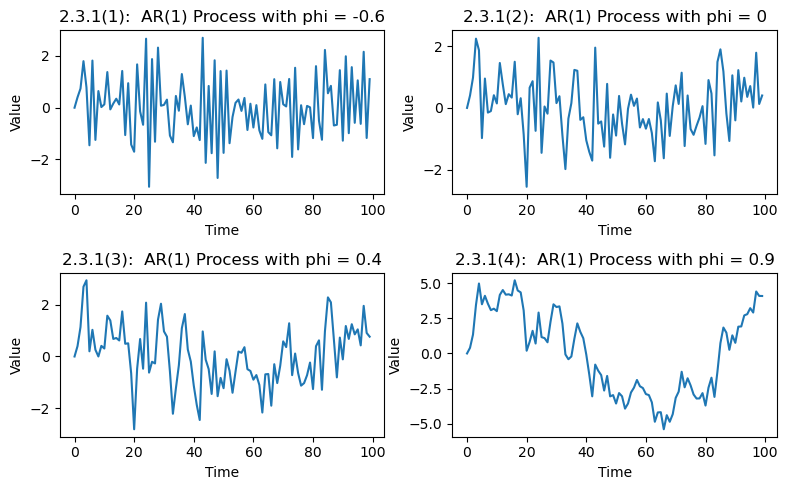

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_ar1_process(phi, n=100): #AR(1)プロセスのデータを生成する
    np.random.seed(0)
    U = np.random.normal(0, 1, n)
    Y = np.zeros(n)
    for t in range(1, n):
        Y[t] = phi * Y[t - 1] + U[t]
    return Y

phi_values = [-0.6, 0, 0.4, 0.9]# パラメータ設定

# 各パラメータに対するAR(1)過程の生成
ar1_processes = [generate_ar1_process(phi) for phi in phi_values]

# プロット
fig, axes = plt.subplots(2, 2, figsize=(8,5 ))
axes = axes.flatten()

for i, phi in enumerate(phi_values):
    axes[i].plot(ar1_processes[i])
    axes[i].set_title(f"2.3.1({i+1}):  AR(1) Process with phi = {phi}")
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Value")

plt.tight_layout()
plt.show()

図2.3.1は,AR(1)過程ですが、異なる$\phi_1=-0.6,0,0.4,0.9$を設定して、擬似乱数を発生させて生成しています.(2)のホワイトノイズの場合は不規則に原点周りを変動しますが,$\phi_1=-0.6$の場合は,データの符号が交互に変わり,上下に激しく変動しています.一方,$1>\phi_1>0$の場合は,隣接するデータが似た値をとるようになるため,データの変動が滑らかになることがわかります.


AR(1)過程は,$Y_t$が1期前の$Y_{t-1}$で説明されるように表現されていますが,より－般には,
$$Y_t=c+\phi_1Y_{t-1}+\phi_2Y_{t-2}+\cdots+\phi_pY_{t-p}+U_t ---2.3.4$$

という$p$次の自己回帰過程(AR($p$)過程)を考えることもできます.

ー移動平均過程ー


移動平均過程は,$Y_t$が現在と過去のショックの加重和で生成されている系列です.1次の移動平均過程(MA(1)過程)は,$\{U_t\}$をホワイトノイズとして,

$$Y_t=\mu+U_t+\theta_1U_{t-1}$$

と表現されます.両辺の期待値をとると,$E[Y_t]=\mu$となり,分散と1次の自己共分散は,
$$\gamma_0=E[(U_t+\theta_1U_{t-1})^2]$$
$$=E[(U_t^2+\theta_1^2U_{t-1}^2+2\theta_1U_tU_{t-1}]=(1+\theta_1^2)\sigma^2$$
$$\gamma_1=E[(U_t+\theta_1U_{t-1})(U_{t-1}+\theta_1U_{t-2})]=\theta_1\sigma^2$$
となります.一方,2次以上の自己共分散は,$h>1$として
$$E[(U_t+\theta_1U_{t-1})(U_{t-h}+\theta_1U_{t--h-1})]=0$$

となります.したがって,MA(1)過程の自己共分散は,

$$
\hat{\gamma}_h=\left\{
\begin{array}{ll}
(1+\theta_1^2)\sigma^2 & (h=0) \\
\theta_1\sigma^2 & (h=1)\\
0 & (h>1)
\end{array}
\right.
$$

となり,MA(1)過程は共分散定常であることがわかります.

AR過程の場合と同様に,MA過程も,より一般には次のような$q$次の移動平均過程(MA($q$)過程)を考えることができます.
$$Y_t=\mu+U_t+\theta_1U_{t-1}+\theta_2U_{t-2}+\cdots+\theta_qU_{t-q}$$


ー自己回帰移動平均過程ー

AR過程とMA過程を組み合わせ$(p,q)$次の(混合)自己回帰移動平均過程を考えることができます.

$$Y_t=c+\phi_1Y_{t-1}+\cdots+\phi_pY_{t-p}+U_t+\theta_1U_{t-1}+\cdots+\theta_qU_{t-q} ---(2.3.5)$$

これはARMA($p,q$)過程とよばれます.

ー自己回帰和分移動平均過程ー

時系列データによっては,$\{Y_t\}$が共分散定常ではなく,階差(差分)をとることで$\{\Delta Y_t\}$が共分散定常となる場合があります.ここで,$\Delta$は階差(差分)オペレーターとよばれる作用素で,$\Delta Y_t=Y_t-Y_{t-1}$と定義されます.このような場合,$\Delta Y_t$がARMA($p,q$)過程

$$\Delta Y_t=c+\phi_1\Delta Y_{t-1}+\cdots+\phi_p\Delta Y_{t-p}+U_t+\theta_1U_{t-1}+\cdots+\theta_qU_{t-q} ---(2.3.6)$$

に従っていると想定して分析が進められます.式(2.3.6)は$(p,1,q)$次の自己回帰和分移動平均過程(ARIMA($p,1,q$)過程)とよばれます.

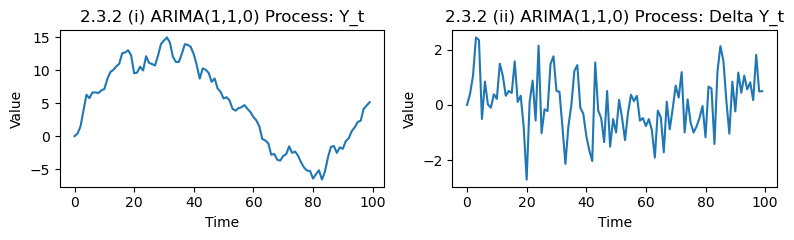

In [6]:
# ARIMA(1,1,0)過程のデータ生成とプロット用関数
def generate_arima_110_process(phi, n=100):#"""ARIMA(1,1,0)プロセスのデータを生成する"""
    np.random.seed(0)
    U = np.random.normal(0, 1, n)
    Y = np.zeros(n)
    Delta_Y = np.zeros(n)
    for t in range(1, n):
        Delta_Y[t] = phi * Delta_Y[t - 1] + U[t]
        Y[t] = Y[t - 1] + Delta_Y[t]
    return Y, Delta_Y

phi = 0.2# パラメータ設定

Y, Delta_Y = generate_arima_110_process(phi)# ARIMA(1,1,0)過程の生成

fig, axes = plt.subplots(1, 2, figsize=(8, 2.5))# プロット

# 原系列 Y_t のプロット
axes[0].plot(Y)
axes[0].set_title("2.3.2 (i) ARIMA(1,1,0) Process: Y_t")
axes[0].set_xlabel("Time")
axes[0].set_ylabel("Value")

# 階差系列 Delta Y_t のプロット
axes[1].plot(Delta_Y)
axes[1].set_title("2.3.2 (ii) ARIMA(1,1,0) Process: Delta Y_t")
axes[1].set_xlabel("Time")
axes[1].set_ylabel("Value")

plt.tight_layout()
plt.show()

図2.3.2は,正規擬似乱数を発生させて生成したARIMA(1,1,0)過程

$$\Delta Y_t=0.2\Delta Y_{t-1}十U_t$$

です.図2.3.2(i)からわかるように,$Y_t$の平均は一定ではなく,$(\{Y_t\}$の定常性については疑わしい.そこで階差をとったグラフが(ii)である,図から判断すれば,この時系列データについてはARMA過程よりもARIMA過程を当てはめたほうがよいことがわかります.

ー特性方程式と単位円ー

＊AR(1)モデルの特性方程式の導出＊

AR(1)モデルは、時系列データがその過去の値に依存する最も単純な自己回帰モデルの一つです。このモデルは次の形で表されます：

$$ Y_t = \phi Y_{t-1} + \epsilon_t $$

ここで、
- $ Y_t $ は時点 $ t $ での時系列の値です。
- $ \phi $ は時系列の過去の値（$ Y_{t-1} $）に対する係数です。
- $ \epsilon_t $ はホワイトノイズ（平均0のランダムな誤差項）です。

AR(1)モデルの特性方程式を導出するには、次のような手順を踏みます：

1. **遅延演算子の導入**:
   遅延演算子 $ L $ を使って、AR(1)モデルを書き換えます。この演算子は、$ L Y_t = Y_{t-1} $ という関係を持っています。

2. **モデルの再表現**:
   AR(1)モデルを遅延演算子を使って書き換えると、次のようになります：
   
   $$ Y_t = \phi L Y_t + \epsilon_t $$

3. **特性方程式の形成**:
   上記の式を変形して、次のように表します：
   
   $$ (1 - \phi L) Y_t = \epsilon_t $$

4. **特性方程式**:
   ここで、特性方程式は $ 1 - \phi L = 0 $ となります。これを $ L $ について解くと、特性方程式の根は $ L = 1/\phi $ です。


AR(1)モデルの定常性を判断するためには、特性方程式の根を分析します。AR(1)モデルが定常であるための条件は、根が単位円の外側にあること、つまり $ |1/\phi| > 1 $ です。これは $ |\phi| < 1 $ と同値です。


＊AR(2)モデルの特性方程式の導出＊

AR(2)モデルは、時系列データがその過去2期の値に依存することを示す自己回帰モデルです。このモデルは次のように表されます：

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \epsilon_t $$

ここで、
- $ Y_t $ は時点 $ t $ での時系列の値です。
- $ \phi_1, \phi_2 $ はそれぞれ1期前、2期前の時系列の値に対する係数です。
- $ \epsilon_t $ はホワイトノイズの誤差項です。


AR(2)モデルから特性方程式を導出するには以下のステップを踏みます：

1. **遅延演算子の導入**:
   遅延演算子 $ L $ を使って、AR(2)モデルを再表現します：

   $$ Y_t = \phi_1 L Y_t + \phi_2 L^2 Y_t + \epsilon_t $$

2. **特性方程式の形成**:
   上記の式を変形して、次のようになります：

   $$ (1 - \phi_1 L - \phi_2 L^2) Y_t = \epsilon_t $$

3. **特性方程式**:
   この式から特性方程式を得るために、$ 1 - \phi_1 L - \phi_2 L^2 = 0 $ という方程式を考えます。これを $ L $ について解くことにより、特性方程式の根を求めます。

＊特性方程式の解析と定常性＊

特性方程式 $ 1 - \phi_1 L - \phi_2 L^2 = 0 $ の根を求めると、AR(2)モデルの挙動、特にその定常性に関する情報が得られます。このモデルが定常であるための条件は、特性方程式の根（すなわち $ L $ の値）が複素平面上で単位円の外側にあること、つまりそれぞれの根の絶対値が1より大きいことです。

＊まとめ＊

AR(2)モデルの特性方程式の根の位置によってモデルの定常性が決定されます。この定常性の条件は、時系列が時間の経過と共に安定した振る舞いを示すかどうかを判断するために重要です。根が単位円の外側にあれば、時系列は定常と見なされ、統計的な分析や予測に適しています。

＊考察＊
特性方程式の解析において実数、虚数、およびラグ演算子を用いる理由は、自己回帰モデルの動的な性質とその定常性を深く理解するためです。特に、時系列モデルが定常か非定常かを判断する際に、これらの要素が重要な役割を果たします。

特性方程式の解は実数または虚数になることがあります。これらの根の性質は、時系列が時間とともにどのように挙動するかを示します。

- **実数の根**: すべての根が実数で、それぞれの絶対値が1より大きい場合、時系列は定常です。
- **虚数の根**: 根が虚数の場合、それらは複素共役ペアとして現れます。これらの根の絶対値（複素平面上での単位円からの距離）が1より大きい場合、時系列は定常です。

ラグ演算子は、時系列データの過去の値が現在の値にどのように影響するかを表現するために使用されます。特性方程式の解析において、ラグ演算子の根が単位円の外側にあることは、過去の値が現在の値に与える影響が時間とともに減少することを意味します。

- **定常性の判断**: 特性方程式の根の絶対値が1より大きい（単位円の外側）かどうかは、時系列が定常か非定常かを判断するための基本的な条件です。
- **時系列の挙動**: 実数と虚数の根の性質は、時系列がどのように挙動するか（例えば、振動するか、一定の値に収束するかなど）を理解するために重要です。

実数と虚数の根、およびラグ演算子は、時系列モデルの定常性を深く理解するために不可欠です。これらは、モデルが長期的にどのような挙動を示すか、そしてその挙動が統計的分析に適しているかを判断するのに役立ちます。特性方程式の根が単位円の外側にあることを確認することは、時系列データが定常的な特性を持つことを保証するための重要なステップです。

ー単位根検定ー

実際の分析では,階差を取るべきかどうかの判断が難しいときがあります. 階差をとる必要があるのは,非定常時系列となる$\phi_1=1$の場合です.したがって,$\phi_1=1$を帰無仮説,$|\phi_1|<1$を対立仮説として仮説検定を行い,階差をとるかどうかの判断を行います.このような検定は単位根検定とよばれ,特に,$\phi_1=1$の$t$検定はディッキー・フラー検定とよばれます。この,$t$検定統計量の分布は漸近的に正規分布に従わないことが知られており,特別な分表を用いる必要があります.


＊ディッキーフラー検定の基本＊

ディッキーフラー検定は、次のような単純な自己回帰モデルに基づいています：

$$ \Delta Y_t = \alpha + \beta_1 t +\beta_2 t^2 + \gamma Y_{t-1} + \delta \Delta Y_{t-1} + \epsilon_t $$

ここで、
- $ Y_t $ は時点 $ t $ での時系列の値です。
- $ \Delta Y_t $ は $ Y_t $ の一階差分（$ Y_t - Y_{t-1} $）です。
- $ \alpha $ は定数項、$ \beta_1 $ はトレンド項、$\beta_2$は２次式トレンド項, \gamma $ は $ Y_{t-1} $ の係数です。
- $ \epsilon_t $ は誤差項です。

検定の焦点は係数 $ \gamma $ にあり、帰無仮説は $ \gamma = 0 $（単位根が存在する）です。

＊Statsmodelsにおける単位根検定＊

`statsmodels` ライブラリでは、ディッキーフラー検定は `adfuller` 関数を通じて提供されています。この関数は、時系列データに対する単位根検定を容易に行うことができます。

`statsmodels` パッケージの `adfuller` 関数は、ディッキーフラー検定を実施するための関数です。この関数は、時系列データが単位根を持つかどうかを検定します。

＊adfuller関数のオプション＊

`adfuller` 関数では、以下の4つの検定タイプを指定できます：

1. regression= n   : $ \alpha = 0 $、$ \beta_1 = 0 $（定数項とトレンド項なし）
2. regression= c   : $ \alpha \neq 0 $、$ \beta_1 = 0 $（定数項あり、トレンド項なし）
3. regression=ct : $ \alpha \neq 0 $、$ \beta_1 \neq 0 $（定数項とトレンド項あり）
4. regression=ctt: $ \alpha \neq 0 $、$ \beta_1 \neq 0 $、$\beta_2 \neq 0$（定数項あり、トレンド項あり、二次式トレンド）

＊adfuller関数の使用例＊

In [7]:
from statsmodels.tsa.stattools import adfuller

adfuller(series, maxlag=None, regression='c', autolag='AIC')


NameError: name 'series' is not defined

ここで、
- `series` は検定する時系列データ。
- `maxlag` は差分項の最大ラグ数。
- `regression` は検定タイプ（`'c'`は定数項あり、`'ct'`は定数項とトレンド項ありなど）。
- `autolag` はラグ数の選択基準（AICなど）。



ー推定と統計的推測ー

AR($p$)過程(2.3.4)の推定方法は,最小二乗法と最尤法によりよく行われます.得られたデータの観測点を$t=1,2,...,T$とした場合,最小二乗法では,式(2.3.4)を$t=1,2,\cdots,T$の範囲で推定すると考えます.最尤法で推定する場合には,$\{U_t\}$に正規分布を仮定します.MA($q$)過程やARMA($p,q$)過程の場合も,多くの場合は正規性を仮定して最尤法で推定します

 
一次数の決定ー

ARMA過程の次数の選択は推定量の一致性に影響を与えるため,非常に重要です.例として,得られた時系列データに

AR(1),AR(2), MA(I),MA(2),ARMA(1,1)過程

のいずれかを当てはめて推定することを考えます.自己相関係数を考えると,AR(1),AR(2),ARMA(1,1)過程の場合,自己相関係数は幾何級数的に減衰して0に近づいていきますが,MA(1)もしくはMA(2)過程の場合は,2次以上もしくは3次以上の自己相関係数は0となります.したがって,得られたデータから標本自己相関係数を求めて2次もしくは3次以上で有意に0と異なるかどうかで,MA過程を選択するか判断できます.

図2.3.3は$AR(1)$過程( $\phi_1=0.8$ )とMA(1)過程( $\theta_1=0.8$ )の真の自己相関係数です.なお,実際のデータから求められた標本自己相関係数の図をコレログラムといいます.

In [ ]:
np.random.seed(0)# AR(1)過程とMA(1)過程のデータ生成
size = 200  # データ点の数
U = np.random.normal(0, 1, size)

phi_1 = 0.8# AR(1)過程: Y_t = 0.8 * Y_{t-1} + U_t
Y_ar1 = np.zeros(size)
for t in range(1, size):
    Y_ar1[t] = phi_1 * Y_ar1[t - 1] + U[t]

theta_1 = 0.8# MA(1)過程: Y_t = U_t + 0.8 * U_{t-1}
Y_ma1 = np.zeros(size)
for t in range(1, size):
    Y_ma1[t] = U[t] + theta_1 * U[t - 1]

lags = 20# 真の自己相関係数の計算
ac_ar1 = [phi_1**i for i in range(lags+1)]
ac_ma1 = [1 if i == 0 else theta_1 if i == 1 else 0 for i in range(lags+1)]

fig, axes = plt.subplots(1, 2, figsize=(9, 2.5))

# AR(1)過程の自己相関係数のプロット
axes[0].stem(range(lags + 1), ac_ar1, basefmt=" ")
axes[0].set_title('2.3.3(i)True Autocorrelation of AR(1) Process')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autocorrelation')
axes[0].set_ylim(-1, 1)

# MA(1)過程の自己相関係数のプロット
axes[1].stem(range(lags + 1), ac_ma1, basefmt=" ")
axes[1].set_title('2.3.3(ii)True Autocorrelation of MA(1) Process')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Autocorrelation')
axes[1].set_ylim(-1, 1)

plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.api as sm
# 偏自己相関係数の計算
pac_ar1 = sm.tsa.pacf(Y_ar1, nlags=lags, method='ols')
pac_ma1 = sm.tsa.pacf(Y_ma1, nlags=lags, method='ols')

# プロット
fig, axes = plt.subplots(1, 2, figsize=(9, 2.5))

# AR(1)過程の偏自己相関係数のプロット
axes[0].stem(range(lags + 1), pac_ar1, basefmt=" ")
axes[0].set_title('2.3.4(i)Partial Autocorrelation of AR(1) Process')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Partial Autocorrelation')
axes[0].set_ylim(-1, 1)

# MA(1)過程の偏自己相関係数のプロット
axes[1].stem(range(lags + 1), pac_ma1, basefmt=" ")
axes[1].set_title('2.3.4(ii)Partial Autocorrelation of MA(1) Process')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Partial Autocorrelation')
axes[1].set_ylim(-1, 1)

plt.tight_layout()
plt.show()


一方、偏自己相関係数は,AR過程の次数選択に有用です.$h$次の偏自己相関係数とは,$Y_t$から$Y_{t-1},\cdots,Y_{t-h+1}$の影響を取り除いたもの(回帰の残差)と,$Y_{t-h}$から$Y_{t-1},\cdots,Y_{t-h+1}$の影響を取り除いたもの(回帰の残差)との間の相関係数です.AR($p$)過程の偏自己相関係数は,$p+1$次以上はすべて0ですが,MA($q$)の過程やARMA($p,q$)の過程の偏自己相関係数は幾何級数的に減衰することがわかっています.図2.3.4は先ほどと同じAR(1)過程とMA(1)過程の偏自己相関係数です.

したがって,標本偏自己相関係数を求めて2次もしくは3次以上で有意に0と異なるかどうかで,AR過程かどうかを選択する判断ができます.表2.3.1参照.


|表2.3.1|
|:-:|

| モデル      | 自己相関係数 | 偏自己相関係数| 
|:-:|:-:|:-:|
| MA(1)      | 2次以降はゼロ | ２次以降は不規則な値 |
| MA(2)      | 3次以降はゼロ | ３次以降は不規則な値 |
| AR(1)      | 指数関数的な減衰  | ２次以降はゼロ    |
| AR(2)      | 指数関数的な減衰（時に正負交互| ３次以降はゼロ|
| ARMA(1,1)  | 徐々に減少      | 徐々に減少 |



ースペクトラムー

ARMAモデルのように$Y_t$を過去$Y_{t-h}$や現在と過去のショック$U_{t-h}$でモデル化して分析する手法は,時間領域での分析に分類されます.一方,$Y_t$の変動を$\sin(\lambda t)$や$\cos(\lambda t)$などの周期関数を用いて分析する手法を,周波数領域での分析といいます.ここでは,$\{Y_t\}$の自己共分散$\gamma_h$について,$\sum_{h=-\infty}^\infty |\gamma_h|<\infty$を満たすと仮定します.有限次元の共分散定常ARMA過程は,この仮定を満しています.このとき,$\{Y_t\}$のスペクトラムまたはスペクトル密度関数は,

$$f(\lambda)=\frac{1}{2\pi}\sum_{h=-\infty}^\infty \gamma_h e^{-i\lambda h}$$

と定義されます.　ここで$i=\sqrt{-1}$です.スペクトラムの定義には虚数が含まれますが,ド・モアプルの定理より$e^{i\lambda h}=\cos(\lambda h)$となり,$\gamma_h=\gamma_{-h}$,$\sin(-\lambda h)=-\sin(\lambda h),\cos(\lambda h)=\cos(\lambda h)$という性質を用いれば,

$$f(\lambda)=\frac{1}{2\pi}\sum_{h=-\infty}^\infty \gamma_h (\cos(\lambda h)- i \sin (\lambda h))$$
$$=\frac{1}{2\pi}\left[\gamma_0 (\cos(0)- i \sin(0))\\+\sum_{h=1}^\infty \gamma_h (\cos(\lambda h)+\cos(-\lambda h)- i\sin(\lambda h)- i\sin(-\lambda h))\right]$$
$$=\frac{1}{2\pi}\left(\gamma_0+2\sum_{h=1}^\infty \gamma_h \cos(\lambda h)\right)$$

と表現できます.これより,スペクトラムは非負,原点対称,周期$2\pi$の関数であることが分かります.
ARMA($p,q$)の過程$\phi(L)Y_t=c+\theta(L)U_t$のスペクトラムは,

$$f(\lambda)=\frac{\sigma^2|\theta(e^{i\lambda})|^2}{2\pi|\phi(e^{i\lambda})|^2}=\frac{\sigma^2\theta(e^{-i\lambda})\theta(e^{i\lambda})}{2\pi \phi(e^{-i\lambda})\phi(e^{i\lambda})}$$

となります.したがって,$\{Y_t\}$がホワイトノイズならば$f(\lambda)=\sigma^2/(2\pi)$であり,AR(1)過程ならば

$$f(\lambda)=\frac{1}{2\pi}\frac{\sigma^2}{(1-\phi_1e^{-i\lambda})(1-\phi_1 e^{i\lambda})}$$
$$=\frac{1}{2\pi}\frac{\sigma^2}{(1+\phi_1^2-2\phi_1\cos(\lambda)}$$

In [ ]:
def compute_spectrum_ar1(phi, n=512, sigma=1):#"""AR(1)過程のスペクトラムを計算する"""
    # 周波数の範囲を設定
    freq = np.linspace(0, np.pi, n)
    # スペクトラムの計算
    spectrum = sigma**2 / (1 + phi**2 - 2 * phi * np.cos(freq))
    return freq, spectrum

# パラメータ設定
phi1 = 0.5
phi2 = -0.5

# スペクトラムの計算
freq, spectrum_phi1 = compute_spectrum_ar1(phi1)
_, spectrum_phi2 = compute_spectrum_ar1(phi2)

# プロット
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5))

# phi = 0.5 のスペクトラム
axes[0].plot(freq, spectrum_phi1)
axes[0].set_title("2.3.5(i)Spectrum of AR(1) Process (phi = 0.5)")
axes[0].set_xlabel("Frequency (lambda)")
axes[0].set_ylabel("Spectrum")

# phi = -0.5 のスペクトラム
axes[1].plot(freq, spectrum_phi2)
axes[1].set_title("2.3.5(ii)Spectrum of AR(1) Process (phi = -0.5)")
axes[1].set_xlabel("Frequency (lambda)")
axes[1].set_ylabel("Spectrum")

plt.tight_layout()
plt.show()

となります.図2.3.5は$\phi_1=0.5$と$\phi_1=-0.5$の場合のAR(1)過程のスペクトラムです。周期性の性質より,$0\ge \lambda \ge \pi$の範囲でのグラフです.この場合,$\phi_1$が正の値ならば,スペクトラムは単調減少関数となり,$\phi_1$が負の値ならば,単調増加関数となります.

スペクトラムの重要な性質の1っとして,次の関係式が成り立っことがあげられます.
$$\int_{-\pi}^\pi f(\lambda)d\lambda=2\int_0^\pi f(\lambda)d\lambda=\gamma_0$$
なお,最初の等式はスぺクトラムの対称性により成り立ちます。したがって,スぺクトラムと$0\ge\lambda\ge \pi$で囲まれた領域の面積は,共分散定常過程の分散に比例することになります.これより,$0\ge \lambda_1\ge \lambda \ge \lambda_2 \ge \pi$で囲まれた領域の面積

$$2\int_{\lambda_1}^{\lambda_2} f(\lambda)d\lambda$$

は,共分散定常過程の変動のうち,周期が$\lambda_1$から$\lambda_2$の変動に帰着する変動であると解釈できます.たとえば,図2.3.5(i)では,$0\ge \lambda\ge \pi/2$の領域の面積が占める割合が多いので,比較的周波数の低い(周期の長い)変動が大きいことがわかります.これは,図2.3.1(４)でみられるように,$\phi_1>0$のAR(1)過程は比較的に緩やかに変動する(=周期が長い)ことに対応しています.一方,図2.3.5(ii)では,周波数の高い(周期の短い)変動要因の割合が大きいが,これは$\phi_1<0$のAR(1)過程が激しく上下に変動することに対応しています.

ーベリオドグラムー

スペクトラムは真の自己共分散を用いて定義されましたが,実際の観測値$y_1,y_2,\cdots,y_T$を用いて作成された

$$\hat{f}(\lambda)=\frac{1}{2\pi}\sum_{h=-T+1}^{T-1} \hat{\gamma}_he^{-i\lambda h}$$

をベリオドグラムといいます.ここで

$$\hat{\gamma}_h=\left\{
\begin{array}{ll}
\frac{1}{T}\sum_{t=h+1}^T(y_t-\bar{y})(y_{t-h}-\bar{y}) & (h=0,1,\cdots,T-1) \\
\hat{\gamma}_{-h} & (h=-1,-2,\cdots, -T+1)
\end{array}
\right.
$$
で,$\bar{y}$は標本平均です.

ペリオドグラムの性質を理解するために,$y_t$を周期関数からなる説明変数へ回帰してみます.まず,$T$は奇数で$T=2M+1$とし,$\lambda_h=2\pi h/T(h=1,2,\cdots,M)$とする.$Y_t$を説明変数$1, \cos(\lambda_h(t—1)), \sin(\lambda_h(t-1))(h=1,2,\cdots,M)$に回帰したときの推定結果を

$$y_t=\hat{\mu}\sum_{h=1}^M\left[\hat{\alpha}_h \cos(\lambda_h(t-1))+\hat{\beta}\sin(\lambda_h(t-1))\right]$$

とすると,次の関係式が成り立っことが知られています.
$$\frac{1}{T}\sum_{t=1}^T(y_t-\bar{y})^2=\frac{1}{2}\sum_{h=1}^M(\hat{\alpha}_h^2+\hat{\beta}_h^2)-----(2.3.7)$$

左辺は$\{y_t\}$の標本分散を表しており,右辺は周期関数の係数の二乗和であるので,式(2.3.7)は,$\{y_t\}$の変動が周波数$\lambda_h(h=1,2,\cdots,M)$に依存した$M$個の要因に分解されていることになります.さらに

$$\frac{1}{2}(\hat{\alpha}_h^2+\hat{\beta}_h^2)=\frac{4\pi}{T}\hat{f}(\lambda_h)$$

という関係が成り立つため,ペリオドグラムは$\{Y_t\}$の変動を周期要因に分解することに用いることができます.$T$が偶数の場合も同様です。なお,ペリオドグラムの平均は,$T$が十分大きければスペクトラムに近づいていきます。漸近不偏性があります。ペリオドグラムはスペクトラムの一致推定量ではありません.しかし,異なる周波数間のペリオドグラムが漸近的に無相関となる性質をもつことから,$\lambda_h$のまわりで(加重)平均をとることにより,一致推定量を作ることができます.

ー季節性とトレンドー

スペクトラム分析とペリオドグラムは、時系列データの周波数成分を分析するために用いられます。これらのツールは、確定的現象や季節性の現象を含む、さまざまな種類の時間依存的なパターンを調査する際に役立ちます。ただし、これらの手法は主に確率的（ランダム）プロセスの周波数特性を分析するのに使われます。

＊ペリオドグラム＊

ペリオドグラムは、時系列データの周波数成分を可視化するための方法です。これは、時系列データのフーリエ変換の大きさの二乗をプロットすることにより、データの周波数に関連するパワーを示します。

- **季節性の分析**：データに季節性パターンが存在する場合、ペリオドグラムは特定の周波数でピークを示すことがあります。これは、その周期がデータに強く現れていることを示しています。

＊スペクトラム分析＊

スペクトラム分析は、時系列データの周波数成分に関するより詳細な情報を提供します。これは、ペリオドグラムに基づいており、データのパワースペクトルを推定します。

- **確定的現象の検出**：確定的な周期的要素や季節性要素は、スペクトラム分析によって識別されることがあります。スペクトラムが特定の周波数で顕著なピークを持つ場合、これはデータに特定の周期的パターンが存在することを示しています。


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 時間領域の信号 f(t) を生成する
t = np.linspace(0, 2 * np.pi, 1000)
#f_t = np.sin(t) + 0.5 * np.sin(2 * t)  # f(t) は2つの正弦波の和
#f_t = 1+2*t
#f_t= np.random.normal(0, 1, 1000).cumsum()
f_t= np.random.normal(0, 1, 1000)

# フーリエ変換を行う関数を定義
def fourier_transform(f_t, omega):
    return np.sum(f_t * np.exp(-1j * omega * t)) * (t[1] - t[0])

# 異なる omega に対してフーリエ変換を計算
omegas = np.linspace(0, 10, 500)
F_omega = np.array([fourier_transform(f_t, omega) for omega in omegas])

# プロット
fig, ax = plt.subplots(2, 1, figsize=(5, 4))

# 時間領域の信号のプロット
ax[0].plot(t, f_t)
ax[0].set_title("Time Domain Signal f(t)")
ax[0].set_xlabel("Time t")
ax[0].set_ylabel("Amplitude")

# 周波数領域の信号のプロット
ax[1].plot(omegas, np.abs(F_omega))
ax[1].set_title("Frequency Domain Signal F(omega)")
ax[1].set_xlabel("Frequency omega")
ax[1].set_ylabel("Magnitude")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 時間領域の信号 f(t) を生成する
t = np.linspace(0, 2 * np.pi, 1000)
#f_t = np.sin(t) + 0.5 * np.sin(2 * t)  # f(t) は2つの正弦波の和
f_t = 1+2*t
#f_t= np.random.normal(0, 1, 1000).cumsum()

# フーリエ変換を行う関数を定義
def fourier_transform(f_t, omega):
    return np.sum(f_t * np.exp(-1j * omega * t)) * (t[1] - t[0])

# 異なる omega に対してフーリエ変換を計算
omegas = np.linspace(0, 10, 500)
F_omega = np.array([fourier_transform(f_t, omega) for omega in omegas])

# プロット
fig, ax = plt.subplots(2, 1, figsize=(5, 4))

# 時間領域の信号のプロット
ax[0].plot(t, f_t)
ax[0].set_title("Time Domain Signal f(t)")
ax[0].set_xlabel("Time t")
ax[0].set_ylabel("Amplitude")

# 周波数領域の信号のプロット
ax[1].plot(omegas, np.abs(F_omega))
ax[1].set_title("Frequency Domain Signal F(omega)")
ax[1].set_xlabel("Frequency omega")
ax[1].set_ylabel("Magnitude")

plt.tight_layout()
plt.show()

ー内生変数と外生変数ー

時系列データ分析における「内生変数」と「外生変数」は、モデル内での変数の役割と原因関係に基づいて区別されます。

＊内生変数（Endogenous Variables）＊

内生変数は、モデル内の他の変数によってその値が影響を受ける変数です。これらの変数は、モデル内の動的な関係性や相互作用によって決定されます。時系列分析の文脈では、内生変数は通常、予測や分析の主要な対象となります。


＊外生変数（Exogenous Variables）＊

外生変数は、モデル外部からの影響を受ける変数です。これらの変数は、モデル内の他の変数に影響を与えることはあっても、モデル内の変数から影響を受けることはありません。外生変数は、モデルにおいて「与えられた」ものとして扱われ、その原因はモデルの範囲外にあるとされます。

＊多重線形回帰と外生変数＊

- **多重線形回帰モデル**:
  多重線形回帰モデルは、複数の独立変数（説明変数）と従属変数（応答変数）の間の線形関係をモデリングするために使用されます。モデルの一般的な形式は次のようになります：

  $$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_k X_k + \epsilon $$

  ここで、
  - $ Y $ は従属変数。
  - $ X_1, X_2, \ldots, X_k $ は独立変数（説明変数）。
  - $ \beta_0, \beta_1, \ldots, \beta_k $ はモデルの係数。
  - $ \epsilon $ は誤差項。

- **外生変数の役割**:
  多重線形回帰モデルにおける独立変数（説明変数）は、モデル外部から与えられ、モデル内の他の変数によってその値が影響を受けない外生変数です。これらの変数は、従属変数の値に影響を与える要因としてモデルに組み込まれます。

＊外生変数の重要性＊

外生変数の選択とその特性は、多重線形回帰モデルの精度と解釈に大きな影響を与えます。不適切な変数の選択や外生性の仮定の破れは、モデルのバイアスや不正確な予測につながる可能性があります。したがって、適切な外生変数の選択とそれらの特性についての理解は、効果的な多重線形回帰モデルを構築する上で非常に重要です。

ランダムウォークモデルでは、通常「内生変数」としての応答変数はモデルの過去の値に依存し、その変動は「外生変数」としてのランダムなショック（乱数）によって引き起こされます。つまり、ランダムウォークは内生変数が自身の過去の値とランダムなショック（外生変数）によって決定されるモデルです。

＊ランダムウォークモデルの基本形＊

ランダムウォークの基本的な形式は次のようになります：

$$ Y_t = Y_{t-1} + \epsilon_t $$

ここで、
- $ Y_t $ は時点 $ t $ での内生変数の値（例えば株価、為替レートなど）。
- $ \epsilon_t $ は時点 $ t $ でのランダムなショック、つまり外生変数で、通常、平均0の正規分布に従うと仮定されます。

＊内生変数と外生変数の役割＊

- **内生変数 ( $ Y_t $ )**:
  ランダムウォークでは、内生変数はその直前の値 $ Y_{t-1} $ に完全に依存しています。つまり、現在の値は直前の値とランダムなショックの和になります。

- **外生変数 ( $ \epsilon_t $ )**:
  ランダムショック $ \epsilon_t $ は外生的であり、モデルの内部構造からは独立しています。このショックが内生変数 $ Y_t $ の変動の原因となります。


## 2.4「推定」と「統計的推定」

「推定」と「統計的推定」は、時系列データの特性やパターンを理解し、将来の動向を予測するために重要です。

ー時系列データの推定ー

時系列データの推定は、過去のデータから将来の値を予測するプロセスです。これには主に二つの側面があります：

1. **パラメータ推定**:
   時系列モデルのパラメータ（例えば、自己回帰モデルの係数）を推定することです。この過程には、適切な数学的手法（最小二乗法、最尤法など）を使用して、モデルが観測されたデータに最も適合するようなパラメータを見つけ出す作業が含まれます。

2. **予測**:
   推定されたパラメータを使用して、未来の時点での時系列の値を予測することです。予測は、モデルが過去のデータに基づいて将来をどの程度正確に予測できるかに依存します。

ー統計的推定ー

統計的推定は、パラメータや将来の値の推定に関連する不確実性を数値化するプロセスです。これには以下の要素が含まれます：

1. **推定量（Estimator）**:
   データから特定のパラメータを推定するための統計的手法です。推定量は、データからパラメータの推定値を計算する規則を提供します。

2. **推定値（Estimate）**:
   推定量に基づいて計算されたパラメータの実際の値です。たとえば、平均や分散などが推定値になります。

3. **信頼区間**:
   真のパラメータ値が含まれる可能性のある値の範囲です。信頼区間は、推定値の不確実性を定量的に示します。

4. **仮説検定**:
   特定の統計的仮説（例えば、あるパラメータが特定の値に等しいという仮説）に対する支持の程度を評価する手法です。


ーAICー
AIC（赤池情報量基準）は、時系列解析においてモデル選択のために広く使用される基準の一つです。AICは、モデルの適合度（どれだけデータに適合しているか）とモデルの複雑さ（使用されるパラメータの数）のトレードオフを評価します。

＊AICの定義＊

AICは次の式で計算されます：

$$ \text{AIC} = 2k - 2\ln(L) $$

ここで、
- $ k $ はモデルにおけるパラメータの数。
- $ L $ は最大尤度（モデルがデータに適合する確率）。

＊AICの使い道＊

1. **モデル選択**:
   AICは、複数の候補モデルの中から最も適切なモデルを選択するのに使用されます。一般に、AICが最も小さいモデルが最良と見なされます。

2. **過剰適合の防止**:
   AICはモデルの適合度を評価しながら、同時にモデルの複雑さ（過剰適合の可能性）も考慮します。これにより、データに過剰適合してしまうことを防ぐことができます。

3. **予測性能の評価**:
   低いAICを持つモデルは、一般的に良い予測性能を持つと考えられます。これは、適合度と複雑さのバランスが取れていることを意味します。


＊注意点＊

- AICは相対的な指標であり、異なるデータセット間での比較には使用できません。
- モデル選択においては、AICの他にもモデルの理論的背景、解釈の容易さ、計算の複雑さなど、他の要因も考慮する必要があります。

AICは、特に複数のモデルが候補となる場合において、最適なモデル選択のための有効な基準を提供します。これにより、時系列データの特性に最も適したモデルを選択し、より信頼性の高い予測や分析を行うことが可能になります。

ーBICー

BIC（ベイズ情報量基準、Bayesian Information Criterion）は、時系列解析におけるモデル選択のための一般的な基準です。AIC（赤池情報量基準）と同様に、BICはモデルの適合度と複雑さのバランスを評価しますが、BICはモデルの複雑さに対してより大きなペナルティを課します。

＊BICの定義＊

BICは次の式で計算されます：

$$ \text{BIC} = \ln(n)k - 2\ln(L) $$

ここで、
- $ n $ はサンプルサイズ。
- $ k $ はモデルにおけるパラメータの数。
- $ L $ は最大尤度（モデルがデータに適合する確率）。

＊BICの使い道＊

1. **モデル選択**:
   複数の候補モデルの中から、BICが最も小さいモデルが最良と見なされます。BICは、特にサンプルサイズが大きい場合に有効な基準です。

2. **過剰適合の防止**:
   BICはモデルの適合度を評価しつつ、モデルの複雑さに対して重いペナルティを課します。これにより、不必要に複雑なモデルの選択を防ぎます。

3. **ベイジアンモデル選択**:
   BICはベイズ統計の観点から導かれる基準であり、事後確率最大化の近似と見なすことができます。そのため、ベイジアンモデル選択においても重要な役割を果たします。


＊注意点＊

- BICはサンプルサイズが大きい場合に特に有効であり、小さいサンプルサイズの場合はAICの方が好まれることがあります。
- モデル選択においては、BICの他にもモデルの理論的背景、解釈の容易さ、計算の複雑さなど、他の要因も考慮する必要があります。

BICは、特に複数のモデルが候補となる場合において、最適なモデル選択のための有効な基準を提供します。サンプルサイズが大きい場合や、過剰適合を避けることが特に重要な場合において、BICによるモデル選択が有用です。

## 2.5 定常性とインサンプル・アウトオブサンプル予想

インサンプル予想（In-sample Forecast）とアウトオブサンプル予想（Out-of-sample Forecast）は、時系列分析における予測の二つの主要なタイプです。これらの予測は、時系列の定常性、特に弱定常と強定常の概念と密接に関連しています。

ーインサンプル予想ー

インサンプル予想は、モデル構築に使用された同じデータセット上での予測です。これは、モデルの適合度を評価するために使用され、モデルが既知のデータにどの程度うまく適合するかを示します。

＊弱定常との関連＊

- 弱定常時系列では、過去のデータの統計的特性（平均、分散、自己共分散）が一定です。これにより、インサンプル予想は、過去のデータに基づいて構築されたモデルを用いて、同じ統計的特性を持つデータをうまく説明できる可能性が高くなります。
- 弱定常性は、時間の経過とともにモデルの適合度が変わらないことを意味します。

ーアウトオブサンプル予想ー

アウトオブサンプル予想は、モデル構築に使用されなかった新しいデータ（未知のデータ）に対する予測です。これは、モデルの将来の予測能力を評価するために使用され、実際の予測シナリオに近いです。

＊強定常との関連＊

- 強定常時系列では、時系列のすべての統計的特性（平均、分散、すべての高次のモーメント）が時間に依存しないため、アウトオブサンプル予想は、過去のデータから抽出されたパターンを将来に適用することが可能です。
- 強定常性は、未知のデータに対するモデルの予測が時間の経過とともに一貫性を持つことを示唆します。


## 2.6 補完（Imputation）と予測（Forecasting）

補完（Imputation）と予測（Forecasting）は、時系列データ解析において異なる目的と方法論を持つ二つの重要なプロセスです。

ー補完ー

補完は、データセット内の欠損値や欠けている情報を推定し埋めるプロセスです。時系列データにおける補完の目的は、不完全なデータを完全な形で復元することにあります。

- **方法**: 補完にはさまざまな手法があります。最も単純なものには平均値や中央値による置換があります。より高度な手法には、時系列のパターンや相関を利用した線形補間、多重代入、時系列モデル（ARIMA、状態空間モデルなど）を利用した方法が含まれます。

- **応用**: 欠損値がランダムに発生する場合（例えば、センサーの故障によるデータの欠落）や、特定のパターンに基づいて欠損が発生する場合（季節的な要因によるデータの欠落など）に有効です。

ー予測ー

予測は、過去のデータを基にして未来の値を推定するプロセスです。時系列データにおける予測の目的は、将来の傾向やパターンを予測することにあります。

- **方法**: 予測には多くの時系列モデルが利用されます。自己回帰モデル（AR）、移動平均モデル（MA）、自己回帰移動平均モデル（ARMA）、自己回帰積分移動平均モデル（ARIMA）や季節性モデル、状態空間モデルなどがあります。

- **応用**: 予測は経済予測、株価分析、天気予報、需要予測など、多くの分野で使用されます。予測の精度は、モデルの選択、データの特性、外部要因の理解に大きく依存します。

ー補完と予測の違いー

- **目的の違い**: 補完は既存のデータの欠損を埋めることに焦点を当てており、予測は未来のデータポイントを推測することを目的としています。

- **データの扱い**: 補完では、既存のデータセット内のパターンや特性を使用して欠損値を推定します。予測では、過去のデータを基に未来の値を予測します。

- **手法の違い**: 補完ではデータの完全性が重要ですが、予測ではデータの動向や周期性が重視されます。

- **不確実性の度合い**: 予測は未来のデータに関するものであるため、補完よりも不確実性が高いことが一般的です。

補完と予測は、時系列データ解析において異なる目的と方法で用いられますが、どちらもデータの完全性と予測精度を高めるために重要な
プロセスです。

## 2.7 総括

時系列分析において、季節性やトレンドの分析を行う際に時間領域と周波数領域のアプローチがありますが、これらのアプローチは異なる視点からデータを分析し、結果に違いが出ることがあります。また、実数と複素数、単位円の概念、確率的トレンドと確定的トレンドは、これらの分析手法において重要な役割を果たします。

### 時間領域と周波数領域の分析

1. **時間領域の分析**:
   - トレンドや季節性を直接的に時系列データから抽出します。
   - 移動平均、指数平滑化、差分化などの手法を用いてトレンドや季節性を分離します。
   - 結果は時間の経過に沿ったデータの挙動を示します。

2. **周波数領域の分析**:
   - データをフーリエ変換して周波数成分に分解し、周期性や季節性を特定します。
   - スペクトル分析やペリオドグラムを用いてデータの周波数特性を評価します。
   - 結果はデータ内の周期的な成分やその強度を示します。

### 実数、複素数、単位円の関係

- 周波数領域分析では、フーリエ変換によりデータは複素数の形式で表現されます。実部と虚部はそれぞれデータの異なる周波数成分の情報を持ちます。
- フーリエ変換の結果はしばしば単位円上で表現され、周波数応答の位相と振幅を示します。
- 時系列モデル、特にARMAモデルなどでは、単位円上での根（roots）や極（poles）の位置がモデルの安定性や特性を示すのに用いられます。

### 確率的トレンドと確定的トレンド

- **確定的トレンド**:
  - 時系列データのトレンドが時間の関数として明確に定義される場合。
  - 線形トレンドや多項式トレンドなど、時間の経過とともに一定のパターンを示す。
  - 時間領域の分析でよく扱われます。

- **確率的トレンド**:
  - 時系列データがランダムウォークやユニットルートプロセスによって表現される場合。
  - トレンドが不定であり、ランダムなショックによって時間とともに進展する。
  - このタイプのトレンドはしばしば差分化によって除去され、時系列を弱定常にするために使用されます。しかし、元の水準に興味がある場合には注意が必要です。

### まとめ

時間領域と周波数領域の分析は異なる視点から時系列データを理解するための手法であり、それぞれが異なる洞察を提供します。確率的トレンドと確定的トレンドの概念は、時系列データのトレンドの性質を理解するための重要な要素です。また、複素数や単位円の概念は、特に周波数領域の分析において重要な役割を果たし、時系列モデルの特性や安定性を理解するのに役立ちます。